# Library

In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 

from prml.utils.datasets import (
    RegressionDataGenerator,
    ClassificationDataGenerator2,
    ClassificationDataGenerator3
)
from prml.utils.plot import plot_classifier
from prml.nn.model import (
    RegressorNN,
    ClassifierNN
)
from prml.nn.layers import (
    Dense,
    Tanh,
    Relu,
    MeanSquaredError,
    SigmoidCrossEntropy,
    SoftmaxCrossEntropy
)

# Regression

In [7]:
def f(x):
    return x**3 - 9*x

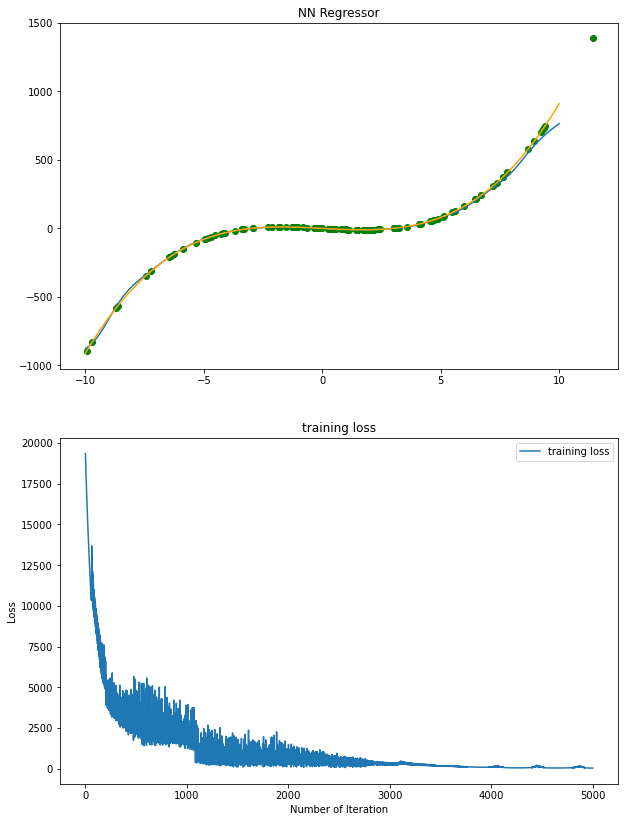

In [9]:
generator = RegressionDataGenerator(f)
X_tr,y_tr = generator(n = 100,std = 0.3,lower = -5,upper = 5) 

# training
model = RegressorNN(
    learning_rate = 1e-3, 
    max_iter = 5000
)
model.add(Dense(200))
model.add(Tanh())
model.add(Dense(1))
losses = model.fit(X_tr,y_tr,loss = MeanSquaredError(),optimizer = "SGD") 

# plot prediction
X = np.linspace(-10,10,100).reshape(-1,1)
y_pred = model.predict(X) 
y_true = f(X)

cmaps = [[0.122, 0.467, 0.706],"orange","green"]
fig,ax = plt.subplots(2,1,figsize = (10,14))
ax[0].plot(X,y_pred,label="Predict",color=cmaps[0])
ax[0].plot(X,y_true,label="Ground Truth",color=cmaps[1])
ax[0].scatter(X_tr,y_tr,label="Training Data",color=cmaps[2])
ax[0].set_title("NN Regressor")

# plot loss 
ax[1].plot(losses,label = "training loss")
ax[1].set_xlabel("Number of Iteration")
ax[1].set_ylabel("Loss")
ax[1].set_title("training loss")

plt.legend()
plt.show()

# Classification

In [10]:
def g(x):
    return x**3/20 - x

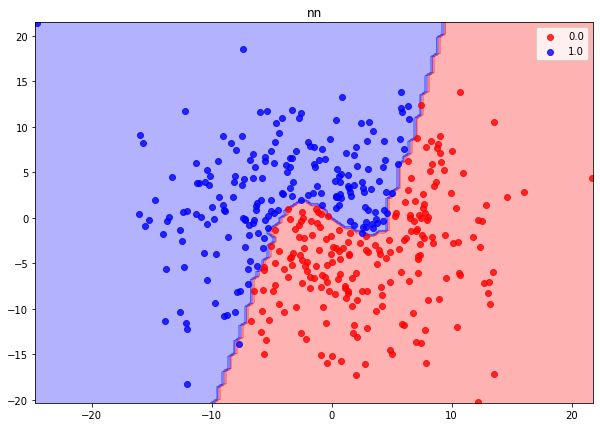

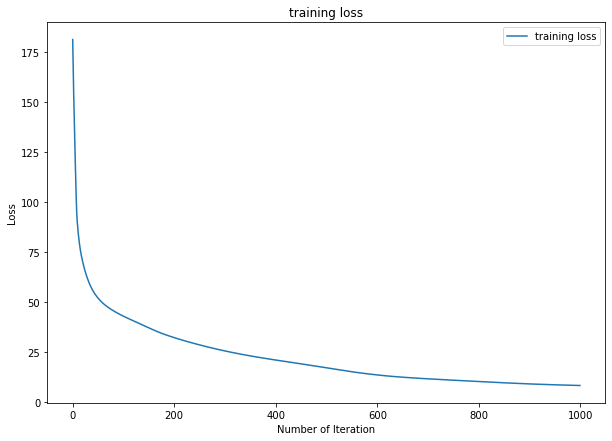

In [11]:
gen = ClassificationDataGenerator2(g) 
X,y = gen(n = 400,
          encoding="label",
          x_lower = -7,
          x_upper = 7,
          y_lower = -7,
          y_upper = 7)  

# plot prediction 
model = ClassifierNN(max_iter=1000) 
model.add(Dense(30))
model.add(Tanh())
model.add(Dense(2)) # two class classification
losses = model.fit(X,y,loss = SigmoidCrossEntropy())

# plot classifier 
plot_classifier(X,y,model,title="nn")

# plot loss
fig,ax = plt.subplots(1,1,figsize = (10,7))
ax.plot(losses,label = "training loss")
ax.set_xlabel("Number of Iteration")
ax.set_ylabel("Loss")
ax.set_title("training loss")
plt.legend()
plt.show()

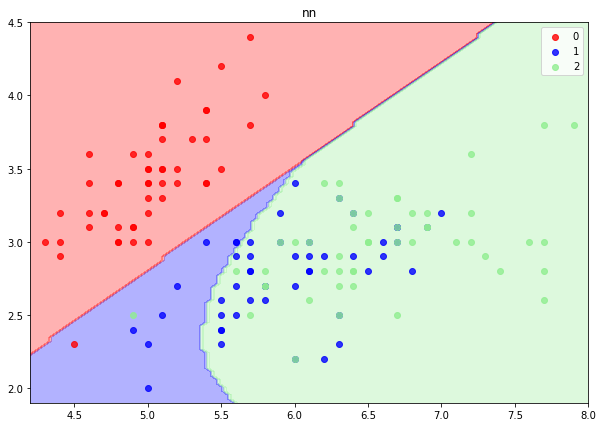

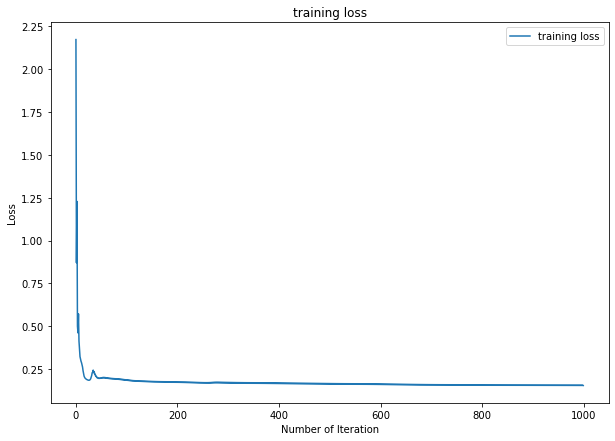

In [12]:
from sklearn.datasets import load_iris 

X,y = load_iris(return_X_y = True)
X = X[:,:2]
n_class = 3

# training
model = ClassifierNN(max_iter=1000,
                     threshold=1e-10) 
model.add(Dense(50))
model.add(Tanh())
model.add(Dense(n_class))
losses = model.fit(X,y,loss = SoftmaxCrossEntropy())

# plot prediction 
plot_classifier(X,y,model,title="nn")

# plot loss 
fig,ax = plt.subplots(1,1,figsize = (10,7))
ax.plot(losses,label = "training loss")
ax.set_xlabel("Number of Iteration")
ax.set_ylabel("Loss")
ax.set_title("training loss")
plt.legend()
plt.show()

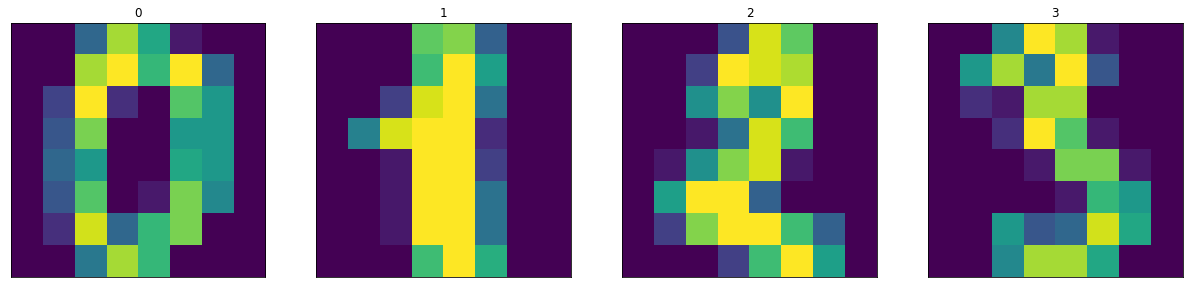

In [18]:
from sklearn.datasets import load_digits 

X,y = load_digits(return_X_y = True)

fig,axes = plt.subplots(1,4,figsize = (21,7))
for i in range(4):
    img = X[i]
    axes[i].matshow(img.reshape(8,8))
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(f"{y[i]}")
    
plt.show()  

Val Acc : 67.41%


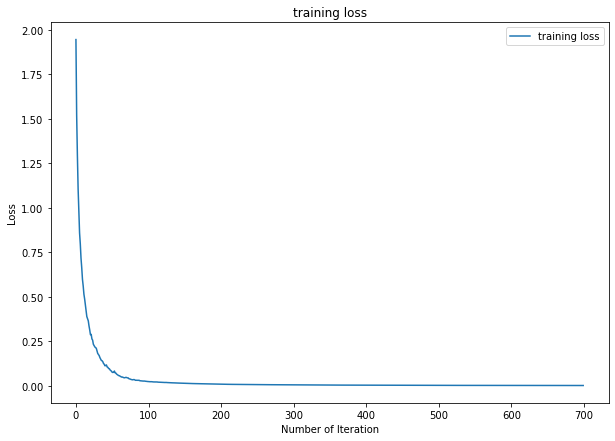

In [31]:
X_tr,X_val,y_tr,y_val = train_test_split(X,y,train_size = 0.7,stratify = y)
n_class = 10 

# training
model = ClassifierNN(max_iter=700,learning_rate=1e-1) 
model.add(Dense(150))
model.add(Tanh())
model.add(Dense(150))
model.add(Tanh())
model.add(Dense(n_class))
losses = model.fit(X_tr,y_tr,loss = SoftmaxCrossEntropy())

# val acc 
y_pred = model.predict(X_val)
acc = (y_pred == y_val).sum()/len(y_val)*100
print(f"Val Acc : {acc:.2f}%")

# plot loss 
fig,ax = plt.subplots(1,1,figsize = (10,7))
ax.plot(losses,label = "training loss")
ax.set_xlabel("Number of Iteration")
ax.set_ylabel("Loss")
ax.set_title("training loss")
plt.legend()
plt.show()